# Current Balance for customers in Synchrony Bank.


HaoKun Wang

The data in the rams_batch_cur_20250325.csv file contains information about a variety of variables in Synchrony Bank

## Research Goals

I would like to pursue the following two research goals in this analysis. 

### Primary Research Goal
In today's financial landscape, understanding customer spending behavior and accurately forecasting customer spending while accounting for macroeconomic factors is crucial for both enhancing customer service and effectively driving organizational growth.

The primary research goal that we puruse in this project will be to develop a robust predictive framework capable of forecasting customer spending for Q4 2025

### Secondary Research Goal

Ideally, the model that we select would also be interpretable. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score


## 1. Basic Data Examination and Cleaning

### 1.1Reading the Dataset and Detecting Any Implicit and explicit Missing Values

In [3]:
df = pd.read_csv('rams_batch_cur_20250325.csv')
df.head(10)

,cu_bhv_scr,ca_cash_bal_pct_crd_line,ca_cash_bal_pct_cash_line,cu_nbr_days_dlq,cu_nbr_of_plastics,ca_avg_utilz_lst_6_mnths,cu_cash_line_am,cu_crd_bureau_scr,cu_crd_line,cu_next_crd_line_rev_date,...,rb_new_bhv_scr,rb_crd_gr_new_crd_gr,cu_processing_date,mo_tot_sales_array_1,mo_tot_sales_array_2,mo_tot_sales_array_3,mo_tot_sales_array_4,mo_tot_sales_array_5,mo_tot_sales_array_6,ca_avg_utilz_lst_3_mnths
0,779,0,0,0,2,2,5000,782,25000,0,...,776,R,2024-12-17,997.56,521.07,647.86,1045.03,858.49,334.54,2
1,735,0,999,0,1,2,0,836,1500,0,...,735,R,2025-02-21,0.00,37.65,60.25,175.67,54.08,0.00,0
2,745,0,0,0,1,2,8000,832,40000,0,...,748,R,2024-10-10,1024.55,578.80,665.81,816.43,2526.27,3129.23,1
3,13,0,0,0,1,0,60,684,300,0,...,13,O,2025-01-27,0.00,0.00,0.00,0.00,0.00,0.00,0
4,6,0,999,0,1,7,0,681,5200,0,...,6,P,2025-03-19,895.33,0.00,0.00,0.00,0.00,0.00,7
5,744,0,999,0,1,1,0,807,12000,0,...,749,R,2025-01-29,0.00,0.00,29.00,0.00,0.00,751.74,0
6,686,0,0,0,2,76,800,727,4000,0,...,688,P,2025-02-20,0.00,0.00,182.53,91.82,211.64,110.00,75
7,672,0,0,0,1,59,600,685,3000,0,...,665,O,2024-11-29,186.10,0.00,0.00,0.00,0.00,0.00,53
8,692,0,0,0,1,15,999999999999999,722,2000,0,...,691,Q,2025-01-24,41.07,46.21,59.56,63.37,0.00,124.07,17
9,751,0,0,0,1,11,1380,813,6900,0,...,727,R,2025-01-19,2936.60,1054.21,1457.87,1027.81,1118.96,5082.14,14


## 2. Dataset Discussion

* `column cu_bhv_scr`: the customer behavioral score, which is a metric used to evaluate a customer’s financial behavior
* `cu_nbr_of_plastics`: the number of plastic cards (e.g., credit cards, debit cards, or prepaid cards) a customer owns. 
* `ca_avg_utilz_lst_6_mnths`: the average utilization of a credit account over the last 6 months.
* `cu_cash_line_am`: cash line amount associated with a customer.
* `cu_crd_bureau_scr`: the credit bureau score associated with a customer.
* `cu_crd_line`: the customer's credit line, which represents the total amount of credit available to a customer.
* `cu_cur_balance`: the customer's current balance. This value represents the total amount a customer currently owes or has available in a specific account, such as a credit card, loan, or line of credit.
* `ca_mnths_since_active`: Number of months since the credit account (ca) was last active.
* `rb_new_bhv_scr`: New behavioral score (rb) related to the customer’s recent financial activity.



### 1.2 Detecting Any Explicit and Implicit Missing Values

In [4]:
df.isna().sum()

cu_bhv_scr                    0
ca_cash_bal_pct_crd_line      0
ca_cash_bal_pct_cash_line     0
cu_nbr_days_dlq               0
cu_nbr_of_plastics            0
ca_avg_utilz_lst_6_mnths      0
cu_cash_line_am               0
cu_crd_bureau_scr             0
cu_crd_line                   0
cu_next_crd_line_rev_date     0
cu_cur_balance                0
cu_cur_nbr_due                0
ca_current_utilz              0
cu_account_nbr                0
cu_line_incr_excl_flag        0
ca_max_dlq_lst_6_mnths        0
ca_mnths_since_active         0
ca_mnths_since_cl_chng        0
ca_mob                        0
ca_nsf_count_lst_12_months    0
cu_otb                        0
cu_rnd_nbr                    0
rb_new_bhv_scr                0
rb_crd_gr_new_crd_gr          0
cu_processing_date            0
mo_tot_sales_array_1          0
mo_tot_sales_array_2          0
mo_tot_sales_array_3          0
mo_tot_sales_array_4          0
mo_tot_sales_array_5          0
mo_tot_sales_array_6          0
ca_avg_u

In [5]:
df.dtypes

cu_bhv_scr                      int64
ca_cash_bal_pct_crd_line        int64
ca_cash_bal_pct_cash_line       int64
cu_nbr_days_dlq                 int64
cu_nbr_of_plastics              int64
ca_avg_utilz_lst_6_mnths        int64
cu_cash_line_am                 int64
cu_crd_bureau_scr               int64
cu_crd_line                     int64
cu_next_crd_line_rev_date       int64
cu_cur_balance                float64
cu_cur_nbr_due                  int64
ca_current_utilz                int64
cu_account_nbr                 object
cu_line_incr_excl_flag         object
ca_max_dlq_lst_6_mnths          int64
ca_mnths_since_active           int64
ca_mnths_since_cl_chng          int64
ca_mob                          int64
ca_nsf_count_lst_12_months      int64
cu_otb                        float64
cu_rnd_nbr                      int64
rb_new_bhv_scr                  int64
rb_crd_gr_new_crd_gr           object
cu_processing_date             object
mo_tot_sales_array_1          float64
mo_tot_sales

In [6]:
np.unique(df['cu_cur_balance'].values)

array([-12506.23, -10928.36,  -4340.52, ...,  38014.  ,  38175.  ,
        40249.  ])

## 2. Preliminary Analysis

We don't indend to use any variables that has weak association with the targeted array. 

In [7]:
df_corr = df.corr(numeric_only = True)
df_corr

,cu_bhv_scr,ca_cash_bal_pct_crd_line,ca_cash_bal_pct_cash_line,cu_nbr_days_dlq,cu_nbr_of_plastics,ca_avg_utilz_lst_6_mnths,cu_cash_line_am,cu_crd_bureau_scr,cu_crd_line,cu_next_crd_line_rev_date,...,cu_otb,cu_rnd_nbr,rb_new_bhv_scr,mo_tot_sales_array_1,mo_tot_sales_array_2,mo_tot_sales_array_3,mo_tot_sales_array_4,mo_tot_sales_array_5,mo_tot_sales_array_6,ca_avg_utilz_lst_3_mnths
cu_bhv_scr,1.000000,-0.049221,-0.094024,0.035855,0.145928,0.229058,-0.159971,0.106866,0.341867,0.024490,...,0.269742,0.001086,0.896304,0.221942,0.231137,0.251658,0.275325,0.275806,0.277302,0.204909
ca_cash_bal_pct_crd_line,-0.049221,1.000000,0.069750,-0.004025,-0.082871,-0.781474,-0.022868,-0.070703,-0.038766,-0.008168,...,-0.036725,0.000652,-0.049843,-0.013478,-0.013426,-0.013446,-0.013400,-0.013372,-0.013505,-0.747767
ca_cash_bal_pct_cash_line,-0.094024,0.069750,1.000000,0.012021,-0.062277,-0.085878,-0.356331,-0.052191,-0.228490,-0.011700,...,-0.186999,0.005084,-0.091833,-0.148199,-0.150716,-0.151346,-0.152248,-0.152819,-0.153539,-0.082800
cu_nbr_days_dlq,0.035855,-0.004025,0.012021,1.000000,-0.032296,0.095846,0.015528,-0.086308,-0.060676,-0.001618,...,-0.083661,0.005238,0.059564,-0.041088,-0.027470,-0.029893,-0.031220,-0.033731,-0.032195,0.100549
cu_nbr_of_plastics,0.145928,-0.082871,-0.062277,-0.032296,1.000000,0.013155,-0.281544,0.170318,0.397223,0.016399,...,0.383412,-0.014200,0.140922,0.299711,0.305147,0.311468,0.313213,0.313805,0.315396,0.006918
ca_avg_utilz_lst_6_mnths,0.229058,-0.781474,-0.085878,0.095846,0.013155,1.000000,0.080108,-0.104856,-0.012805,0.013011,...,-0.154997,0.003568,0.243118,0.044139,0.047125,0.049629,0.052690,0.056946,0.063010,0.959431
cu_cash_line_am,-0.159971,-0.022868,-0.356331,0.015528,-0.281544,0.080108,1.000000,-0.082208,-0.213295,-0.003602,...,-0.229693,-0.003511,-0.161191,-0.202052,-0.207969,-0.211984,-0.211836,-0.208460,-0.206365,0.070714
cu_crd_bureau_scr,0.106866,-0.070703,-0.052191,-0.086308,0.170318,-0.104856,-0.082208,1.000000,0.309046,0.004808,...,0.334776,-0.008579,0.097332,0.161272,0.163499,0.163207,0.161681,0.160970,0.160953,-0.118936
cu_crd_line,0.341867,-0.038766,-0.228490,-0.060676,0.397223,-0.012805,-0.213295,0.309046,1.000000,0.003427,...,0.932191,-0.009456,0.335790,0.519994,0.525338,0.531179,0.532776,0.533160,0.533973,-0.017425
cu_next_crd_line_rev_date,0.024490,-0.008168,-0.011700,-0.001618,0.016399,0.013011,-0.003602,0.004808,0.003427,1.000000,...,-0.000021,-0.002363,0.026718,0.006048,0.004319,0.012571,0.011399,0.011024,0.012018,0.011059


In [8]:
df1 = df_corr[df_corr['cu_cur_balance'] > 0.35] 
df1 = df1['cu_cur_balance']
df1

ca_avg_utilz_lst_6_mnths    0.353187
cu_crd_line                 0.420598
cu_cur_balance              1.000000
ca_current_utilz            0.398774
mo_tot_sales_array_1        0.481084
mo_tot_sales_array_2        0.388141
mo_tot_sales_array_3        0.383533
mo_tot_sales_array_4        0.380771
mo_tot_sales_array_5        0.381112
mo_tot_sales_array_6        0.377325
ca_avg_utilz_lst_3_mnths    0.357590
Name: cu_cur_balance, dtype: float64

In [9]:
df9 = df[['ca_avg_utilz_lst_6_mnths', 'cu_crd_line', 'mo_tot_sales_array_1', 'mo_tot_sales_array_2', 'mo_tot_sales_array_3', 'mo_tot_sales_array_4', 'mo_tot_sales_array_5', 'mo_tot_sales_array_6', 'ca_avg_utilz_lst_3_mnths', 'cu_cur_balance']]
df9 = df9.head(5000)
df9

,ca_avg_utilz_lst_6_mnths,cu_crd_line,mo_tot_sales_array_1,mo_tot_sales_array_2,mo_tot_sales_array_3,mo_tot_sales_array_4,mo_tot_sales_array_5,mo_tot_sales_array_6,ca_avg_utilz_lst_3_mnths,cu_cur_balance
0,2,25000,997.56,521.07,647.86,1045.03,858.49,334.54,2,1017.56
1,2,1500,0.00,37.65,60.25,175.67,54.08,0.00,0,20.00
2,2,40000,1024.55,578.80,665.81,816.43,2526.27,3129.23,1,1037.55
3,0,300,0.00,0.00,0.00,0.00,0.00,0.00,0,20.00
4,7,5200,895.33,0.00,0.00,0.00,0.00,0.00,7,851.73
...,...,...,...,...,...,...,...,...,...,...
4995,8,15000,1181.50,1159.24,1008.88,2024.37,656.31,1855.92,7,1201.50
4996,0,2300,81.94,0.00,0.00,26.24,0.00,0.00,0,35.56
4997,0,20000,0.00,0.00,164.30,0.00,0.00,0.00,0,20.00
4998,44,800,0.00,0.00,0.00,0.00,0.00,0.00,40,323.88


* `column cu_bhv_scr`: the customer behavioral score, which is a metric used to evaluate a customer’s financial behavior
* `cu_nbr_of_plastics`: the number of plastic cards (e.g., credit cards, debit cards, or prepaid cards) a customer owns. 
* `ca_avg_utilz_lst_6_mnths`: the average utilization of a credit account over the last 6 months.
* `cu_cash_line_am`: cash line amount associated with a customer.
* `cu_crd_bureau_scr`: the credit bureau score associated with a customer.
* `cu_crd_line`: the customer's credit line, which represents the total amount of credit available to a customer.
* `cu_cur_balance`: the customer's current balance. This value represents the total amount a customer currently owes or has available in a specific account, such as a credit card, loan, or line of credit.
* `ca_mnths_since_active`: Number of months since the credit account (ca) was last active.
* `rb_new_bhv_scr`: New behavioral score (rb) related to the customer’s recent financial activity.

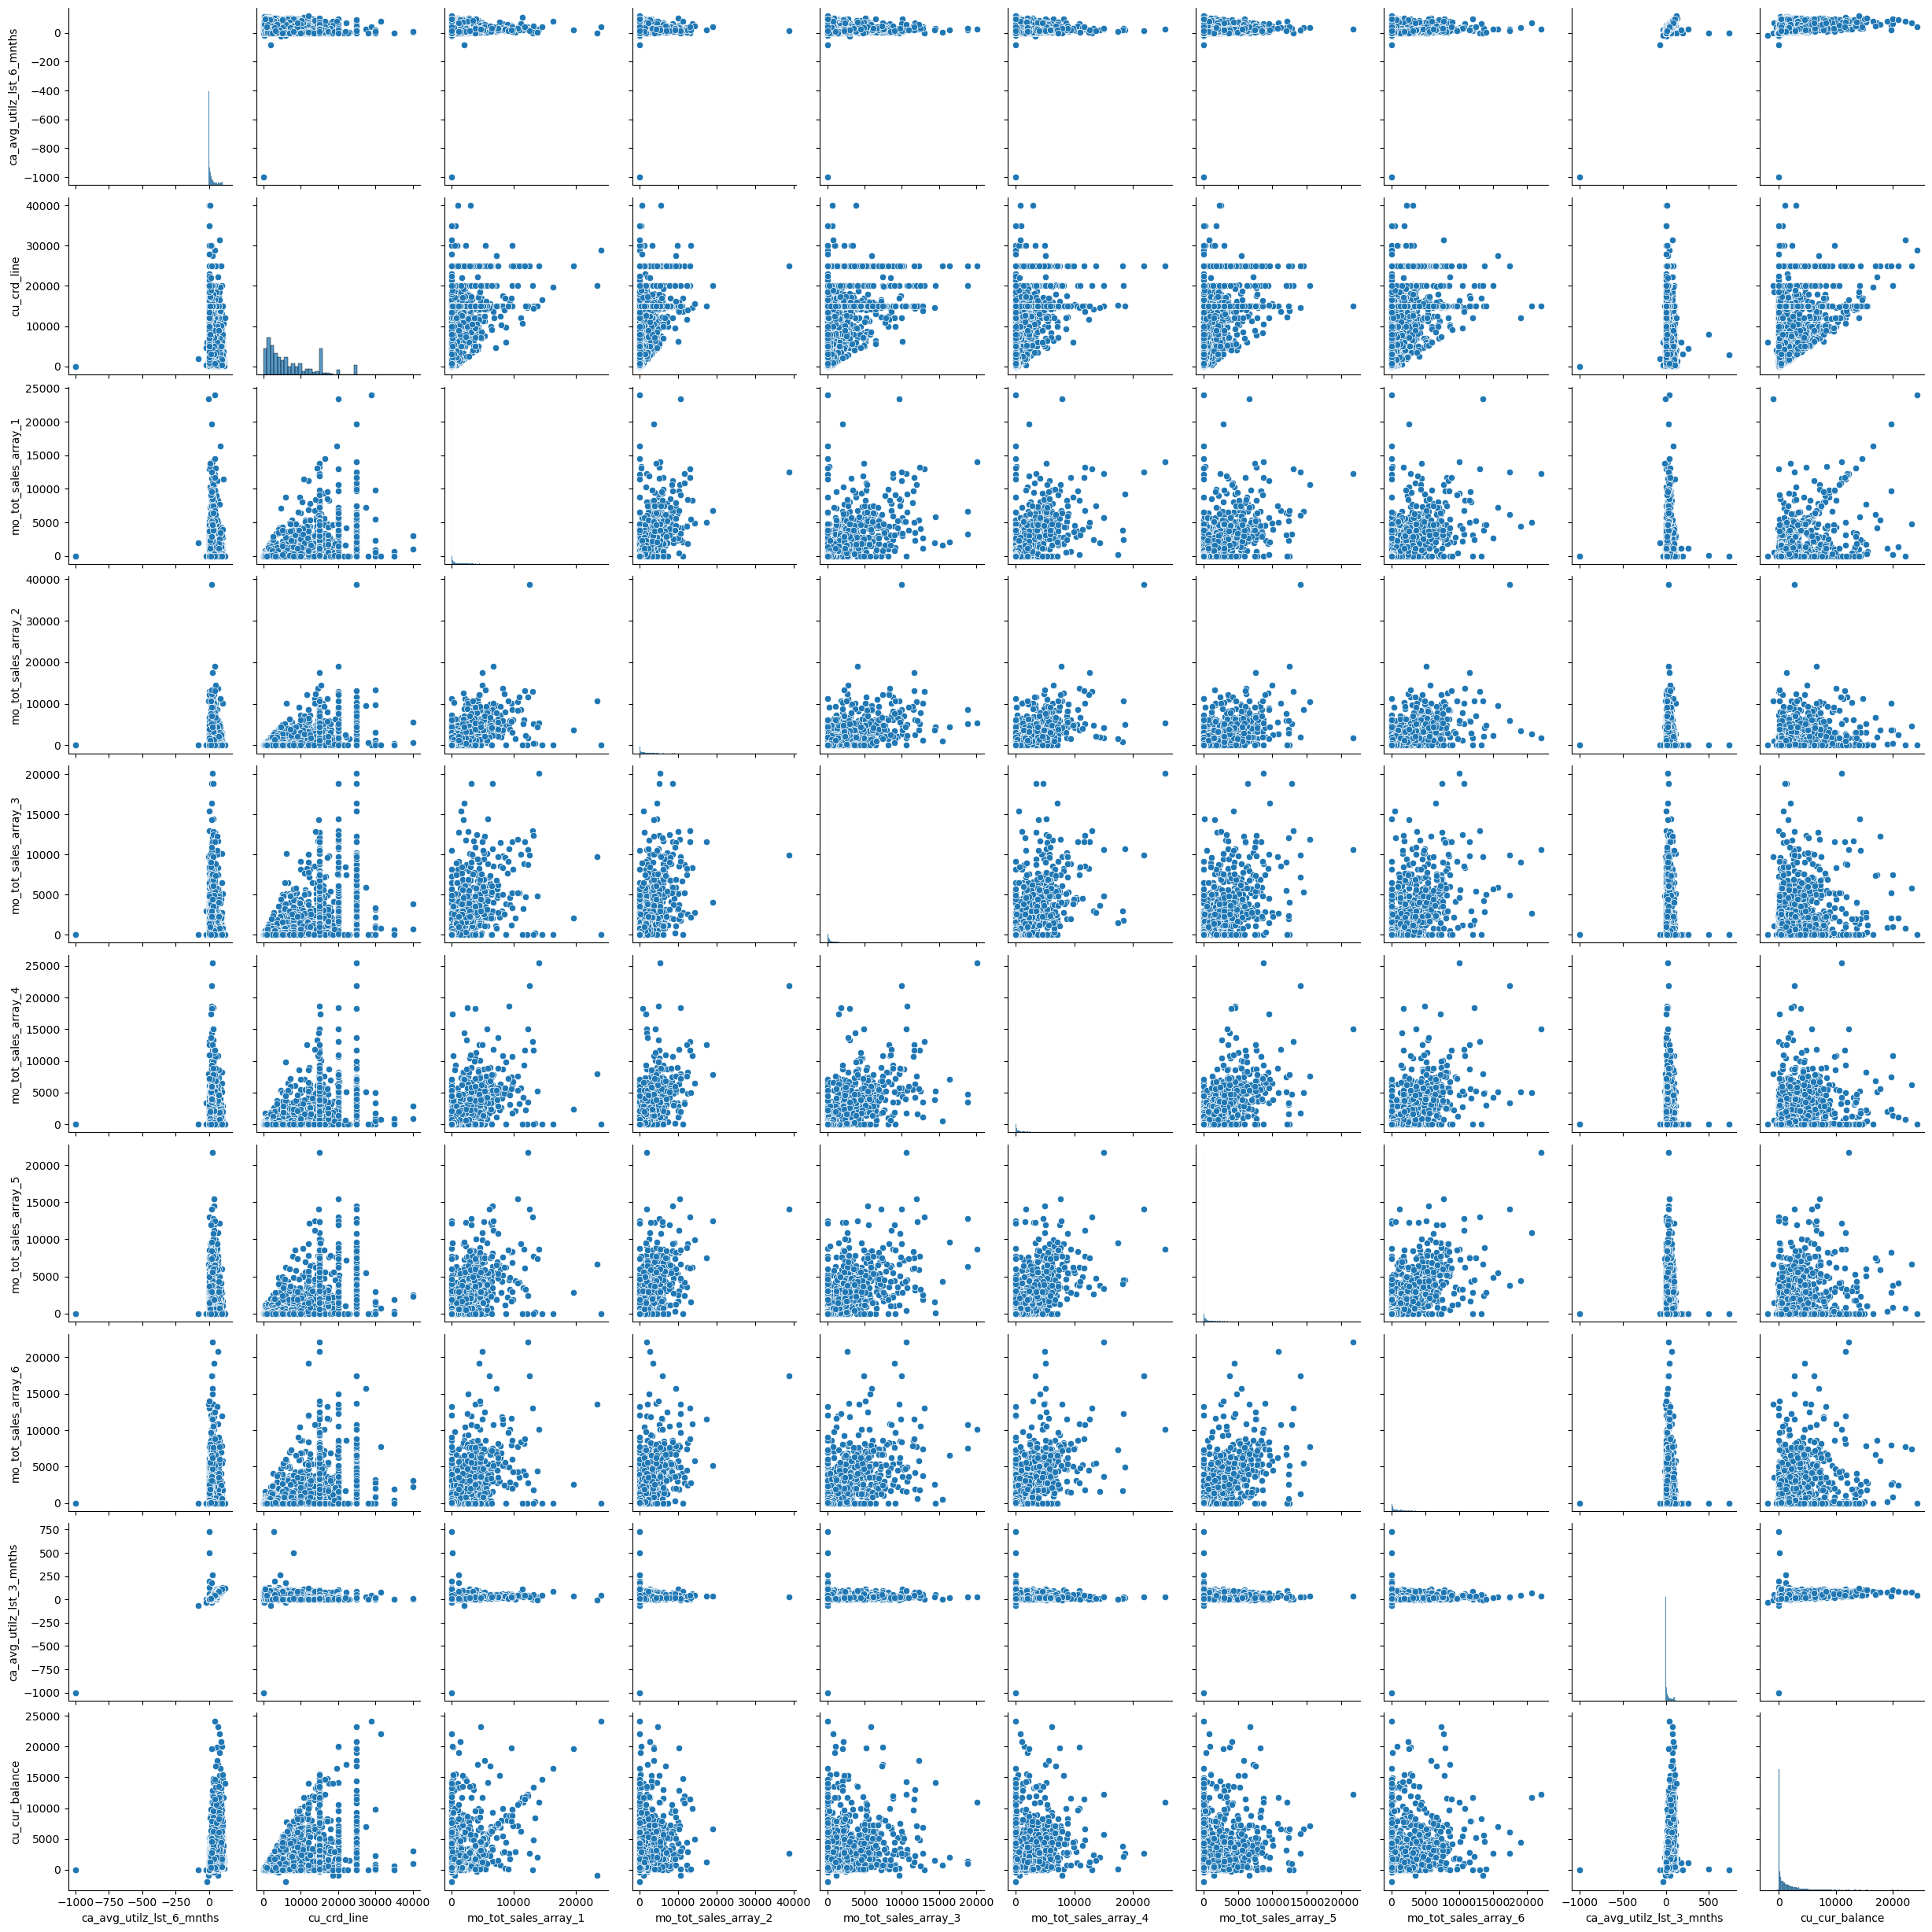

In [10]:
sns.pairplot(df9)


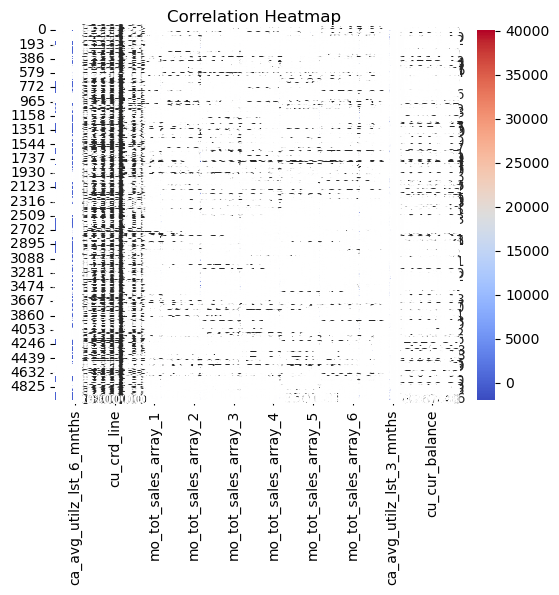

In [11]:
sns.heatmap(df9, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

## 3. Non-Regularized Model Traing-Test-Split Analysis

In [12]:
df_train, df_test = train_test_split(df9, test_size = 0.2, random_state=555)

In [13]:
x_df_train = df_train.drop(['cu_cur_balance'], axis = 1)
x_df_train.head(5)

,ca_avg_utilz_lst_6_mnths,cu_crd_line,mo_tot_sales_array_1,mo_tot_sales_array_2,mo_tot_sales_array_3,mo_tot_sales_array_4,mo_tot_sales_array_5,mo_tot_sales_array_6,ca_avg_utilz_lst_3_mnths
3185,70,4000,0.0,0.00,1508.11,0.00,4832.38,2013.69,77
3159,56,120,0.0,72.95,0.00,0.00,0.00,45.07,50
3102,0,4500,0.0,0.00,0.00,0.00,0.00,0.00,0
120,3,15000,155.0,307.50,697.38,802.82,256.36,621.47,2
2567,15,7000,0.0,0.00,0.00,0.00,0.00,0.00,14


In [14]:
y_df_train = df_train['cu_cur_balance']
y_df_train

3185    2934.60
3159     132.54
3102      20.00
120      175.00
2567     998.33
         ...   
233      236.19
1430    2665.58
2628    4717.68
1057     223.34
4782      20.00
Name: cu_cur_balance, Length: 4000, dtype: float64

In [15]:
x_df_test = df_test.drop(['cu_cur_balance'], axis = 1)
x_df_test.head(5)

,ca_avg_utilz_lst_6_mnths,cu_crd_line,mo_tot_sales_array_1,mo_tot_sales_array_2,mo_tot_sales_array_3,mo_tot_sales_array_4,mo_tot_sales_array_5,mo_tot_sales_array_6,ca_avg_utilz_lst_3_mnths
4434,80,400,22.39,57.07,175.30,213.53,0.0,0.00,89
3169,0,1500,0.00,0.00,0.00,0.00,0.0,0.00,0
735,0,5000,0.00,0.00,0.00,0.00,0.0,0.00,0
3720,0,1000,0.00,0.00,0.00,0.00,0.0,133.73,0
3974,80,900,0.00,378.86,733.53,4.99,0.0,189.39,88


In [16]:
y_df_test = df_test['cu_cur_balance']
y_df_test

4434      362.67
3169       20.00
735        20.00
3720       20.00
3974      935.30
          ...   
2220       20.00
3279       20.00
4746    11517.30
4948       20.00
1481      948.24
Name: cu_cur_balance, Length: 1000, dtype: float64

In [17]:
scaler_training = StandardScaler()
scaled_expl_vars = scaler_training.fit_transform(x_df_train)
X_train = pd.DataFrame(scaled_expl_vars, columns=x_df_train.columns)
X_train 

,ca_avg_utilz_lst_6_mnths,cu_crd_line,mo_tot_sales_array_1,mo_tot_sales_array_2,mo_tot_sales_array_3,mo_tot_sales_array_4,mo_tot_sales_array_5,mo_tot_sales_array_6,ca_avg_utilz_lst_3_mnths
0,1.460537,-0.468799,-0.399770,-0.408433,0.512637,-0.391838,2.747673,0.805007,1.414386
1,1.067280,-1.072140,-0.399770,-0.362953,-0.397416,-0.391838,-0.412121,-0.369593,0.755698
2,-0.505750,-0.391049,-0.399770,-0.408433,-0.397416,-0.391838,-0.412121,-0.396485,-0.464094
3,-0.421481,1.241703,-0.296653,-0.216727,0.023410,0.084507,-0.244492,-0.025677,-0.415303
4,-0.084403,-0.002299,-0.399770,-0.408433,-0.397416,-0.391838,-0.412121,-0.396485,-0.122553
...,...,...,...,...,...,...,...,...,...
3995,-0.252942,-0.795350,-0.257269,-0.347193,-0.324340,-0.261345,-0.272825,-0.333077,-0.293323
3996,0.645932,-0.173349,-0.399770,-0.408433,0.071263,-0.391838,-0.412121,-0.396485,0.633719
3997,1.320088,0.059901,-0.367185,-0.392847,-0.340470,-0.391838,-0.412121,-0.376228,1.097240
3998,1.011100,-1.028600,-0.365608,-0.408433,-0.272094,-0.391838,-0.412121,-0.396485,0.853281


In [18]:
scaler_training = StandardScaler()
scaled_expl_vars = scaler_training.fit_transform(x_df_test)
X_test = pd.DataFrame(scaled_expl_vars, columns=x_df_test.columns)
X_test

,ca_avg_utilz_lst_6_mnths,cu_crd_line,mo_tot_sales_array_1,mo_tot_sales_array_2,mo_tot_sales_array_3,mo_tot_sales_array_4,mo_tot_sales_array_5,mo_tot_sales_array_6,ca_avg_utilz_lst_3_mnths
0,1.417632,-1.008885,-0.379024,-0.330020,-0.300526,-0.284814,-0.408305,-0.406153,1.581340
1,-0.431825,-0.832914,-0.390186,-0.357442,-0.399161,-0.403666,-0.408305,-0.406153,-0.428388
2,-0.431825,-0.273004,-0.390186,-0.357442,-0.399161,-0.403666,-0.408305,-0.406153,-0.428388
3,-0.431825,-0.912901,-0.390186,-0.357442,-0.399161,-0.403666,-0.408305,-0.335167,-0.428388
4,1.417632,-0.928898,-0.390186,-0.175399,0.013572,-0.400888,-0.408305,-0.305622,1.558758
...,...,...,...,...,...,...,...,...,...
995,-0.431825,-0.752927,-0.390186,-0.357442,-0.399161,-0.403666,-0.408305,-0.406153,-0.428388
996,-0.431825,-0.273004,-0.390186,-0.357442,-0.399161,-0.403666,-0.408305,-0.406153,-0.428388
997,0.516022,2.926477,5.459079,5.951953,6.126562,6.081803,2.916312,4.270653,0.632929
998,-0.431825,-0.512965,-0.336945,-0.168379,-0.399161,-0.403666,-0.408305,-0.406153,-0.428388


In [19]:
formula = "cu_cur_balance ~ ca_avg_utilz_lst_6_mnths + cu_crd_line + mo_tot_sales_array_1 + mo_tot_sales_array_2 + mo_tot_sales_array_3 + mo_tot_sales_array_4 + mo_tot_sales_array_5 +mo_tot_sales_array_6 + ca_avg_utilz_lst_3_mnths"
full_model = smf.ols(formula=formula, data=df_train).fit()
y_pred = full_model.predict(df_test)
test_r2 = r2_score(df_test["cu_cur_balance"], y_pred)
print("Test R²:", test_r2)

Test R²: 0.45713771470454956


## 3. Implementation of a LASSO Model Traing-Test-Split Analysis

In [20]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 10]
for alpha in alphas:
    lasso_mod = Lasso(alpha=alpha, max_iter=1000)
    lasso_mod.fit(X_train, y_df_train)
    score = lasso_mod.score(X_test, y_df_test)
    print(f"Alpha: {alpha}, Score: {score}")

Alpha: 0.0001, Score: 0.45053714493665664
Alpha: 0.001, Score: 0.4505371528987897
Alpha: 0.01, Score: 0.4505374635119014
Alpha: 0.1, Score: 0.4505385165777481
Alpha: 0.5, Score: 0.4505420973413451
Alpha: 1.0, Score: 0.4505448237233918
Alpha: 10, Score: 0.45041029941731836


In [21]:
best_lasso_mod = Lasso(alpha=1, max_iter=1000)
best_lasso_mod.fit(X_train, y_df_train)

Lasso(alpha=1)

best_lasso_mod = Lasso(alpha=alpha, max_iter=1000)

alpha = 1.0 best matches our goal. 

In [22]:
df_slopes = pd.DataFrame({'best_mod_pair' : best_lasso_mod.coef_.T}, index = x_df_train.columns)
df_slopes

,best_mod_pair
ca_avg_utilz_lst_6_mnths,756.635463
cu_crd_line,522.522017
mo_tot_sales_array_1,794.252264
mo_tot_sales_array_2,36.872924
mo_tot_sales_array_3,48.088010
mo_tot_sales_array_4,-35.868667
mo_tot_sales_array_5,-36.344479
mo_tot_sales_array_6,-13.249776
ca_avg_utilz_lst_3_mnths,173.536549


## 4. Implementation of a Ridge Model Traing-Test-Split Analysis

In [23]:
alphas = [0.0001, 0.01, 0.1, 0.5, 1.0, 10]

for alpha in alphas:
    Ridge_mod = Ridge(alpha=alpha, max_iter=1000)
    Ridge_mod.fit(X_train, y_df_train)
    score = Ridge_mod.score(X_test, y_df_test)
    print(f"Alpha: {alpha}, Score: {score}")

Alpha: 0.0001, Score: 0.4505371361995646
Alpha: 0.01, Score: 0.4505368302973809
Alpha: 0.1, Score: 0.4505340492236727
Alpha: 0.5, Score: 0.45052168574545093
Alpha: 1.0, Score: 0.45050622418766995
Alpha: 10, Score: 0.4502265901476298


In [24]:
best_ridge_mod = Lasso(alpha=0.0001, max_iter=1000)
best_ridge_mod.fit(X_train, y_df_train)

Lasso(alpha=0.0001)

In [25]:
df_slopes = pd.DataFrame({'best_mod_pair' : best_ridge_mod.coef_.T}, index = x_df_train.columns)
df_slopes

,best_mod_pair
ca_avg_utilz_lst_6_mnths,757.865178
cu_crd_line,524.196043
mo_tot_sales_array_1,796.604585
mo_tot_sales_array_2,39.387843
mo_tot_sales_array_3,51.147101
mo_tot_sales_array_4,-39.203277
mo_tot_sales_array_5,-39.424504
mo_tot_sales_array_6,-15.923558
ca_avg_utilz_lst_3_mnths,173.508493


## 5. Implementation of a ElasticNet Model Cross Validation Analysis

In [26]:
lin_mod = LinearRegression()
en_mod_perams = ElasticNet(alpha = 0.05, l1_ratio = 0.5, max_iter = 1000)
en_mod1 = ElasticNet(alpha = 0.5, l1_ratio = 0.7, max_iter = 1000)
en_mod2 = ElasticNet(alpha = 1, l1_ratio = 0.7, max_iter = 1000)
en_mod3 = ElasticNet(alpha = 2.5, l1_ratio = 0.7, max_iter = 1000)

In [27]:
cross_val = KFold(n_splits=4, shuffle = True, random_state=207)
cross_val

KFold(n_splits=4, random_state=207, shuffle=True)

In [28]:
test_fold_r2 = cross_val_score(lin_mod, X_train, y_df_train, cv = cross_val, scoring = 'r2')
print('Test Fold R^2 Values:', test_fold_r2)
print('Mean Test Fold R^2:', test_fold_r2.mean())
print('std Test Fold R^2:', test_fold_r2.std())

Test Fold R^2 Values: [0.37126312 0.54882464 0.39304565 0.31838425]
Mean Test Fold R^2: 0.4078794137641888
std Test Fold R^2: 0.08578423071723061


## 6. Implementation of Non-Linear Regression

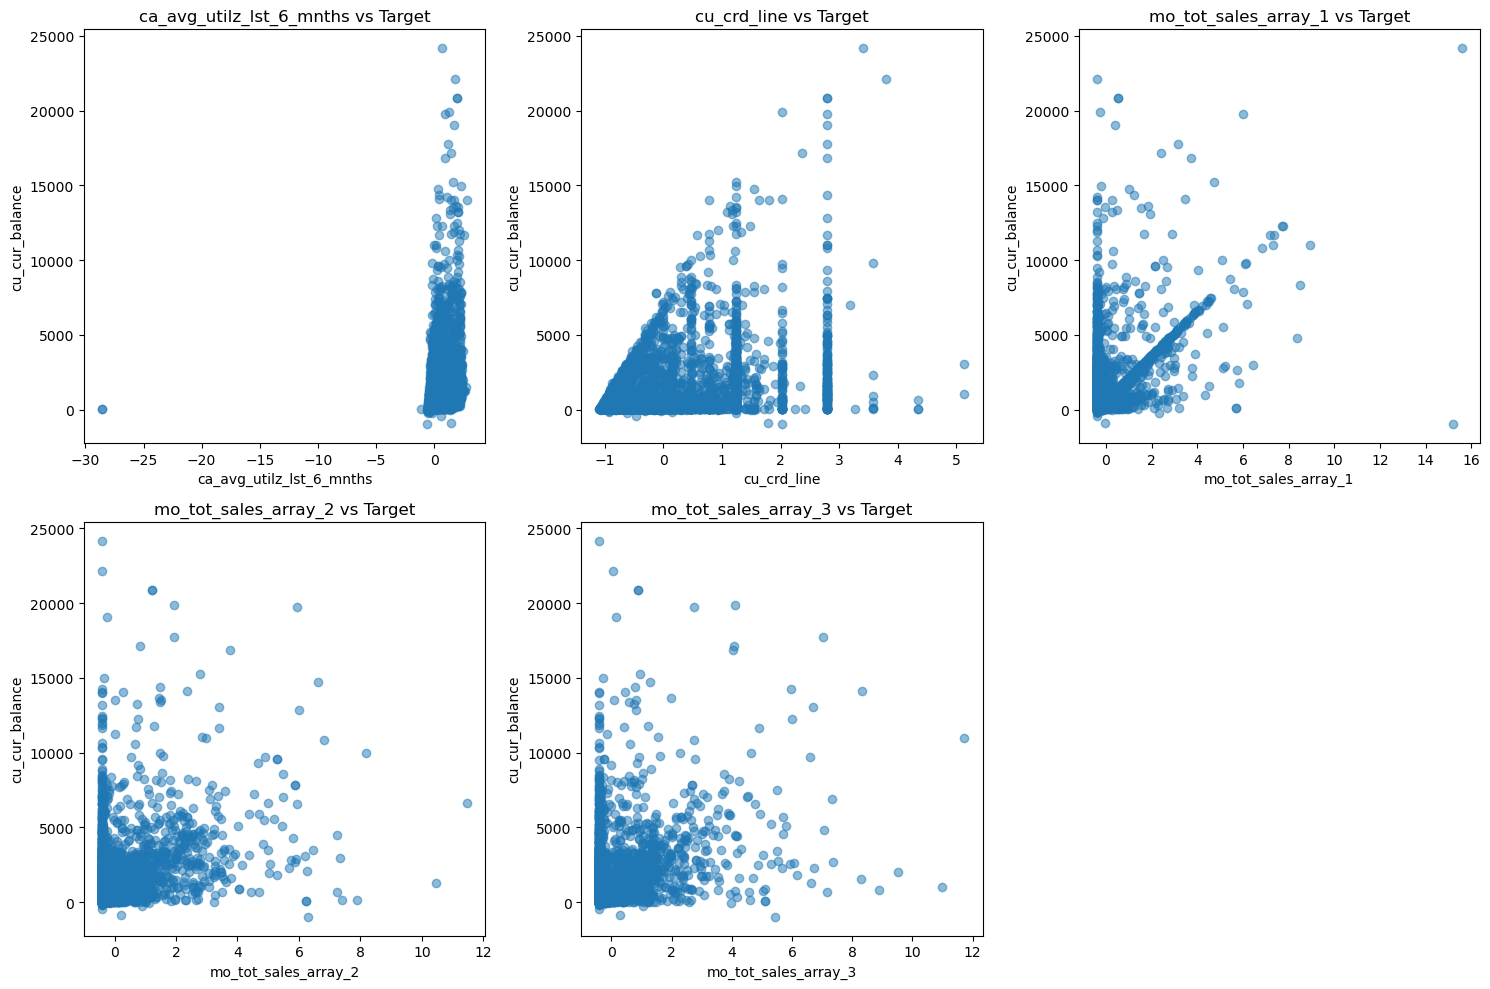


Random Forest Cross-Validation Results:
Mean R²: 0.9253
Std R²: 0.0104

SVR (RBF) Cross-Validation Results:
Mean R²: -0.0334
Std R²: 0.0043


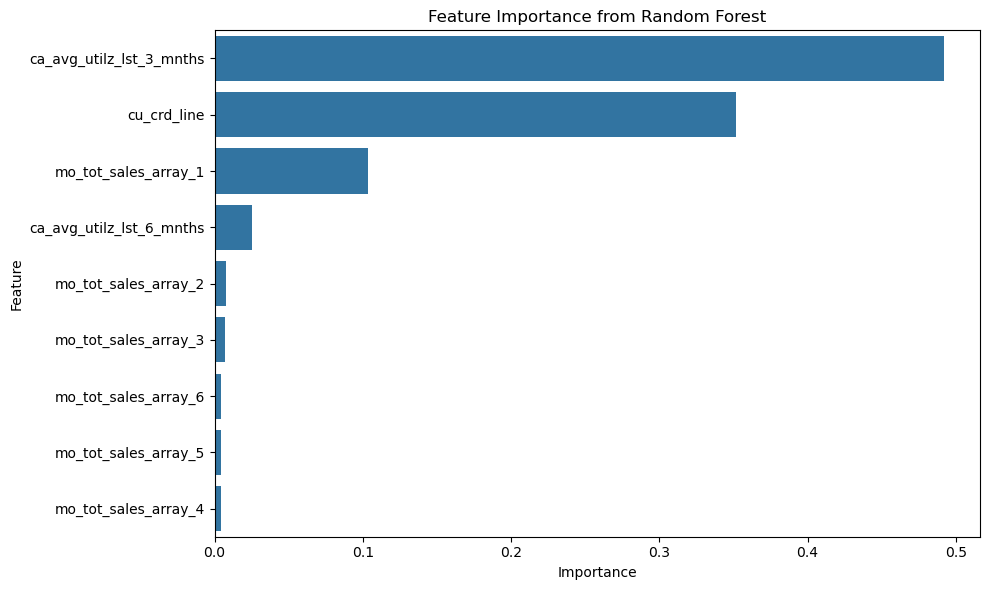

In [29]:
# 1. Visualize relationships between features and target
plt.figure(figsize=(15, 10))
features = ['ca_avg_utilz_lst_6_mnths', 'cu_crd_line', 
           'mo_tot_sales_array_1', 'mo_tot_sales_array_2', 'mo_tot_sales_array_3']

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(X_train[feature], y_df_train, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('cu_cur_balance')
    plt.title(f'{feature} vs Target')
plt.tight_layout()
plt.show()

# 2. Try Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_model, X_train, y_df_train, cv=4, scoring='r2')
print("\nRandom Forest Cross-Validation Results:")
print(f"Mean R²: {rf_scores.mean():.4f}")
print(f"Std R²: {rf_scores.std():.4f}")

# 3. Try SVR with RBF kernel
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
svr_model = SVR(kernel='rbf')
svr_scores = cross_val_score(svr_model, X_train_scaled, y_df_train, cv=4, scoring='r2')
print("\nSVR (RBF) Cross-Validation Results:")
print(f"Mean R²: {svr_scores.mean():.4f}")
print(f"Std R²: {svr_scores.std():.4f}")

# 4. Feature importance from Random Forest
rf_model.fit(X_train, y_df_train)
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()


## 6. Best Model Discussion

In [30]:
results = pd.DataFrame({
    'Model': ['Full-Model', 'Linear (LASSO)', 'Linear (Ridge)', 'Linear (ElasticNet)', 'Random Forest', 'SVR (RBF)'],
    'Mean R²': [0.4571, 0.4791, 0.4791, 0.4459, rf_scores.mean(), svr_scores.mean()],
    'Std R²': ['N/A', 'N/A', 'N/A', '0.0849', f'{rf_scores.std():.4f}', f'{svr_scores.std():.4f}'],
    'Method': ['Train-Test', 'Train-Test', 'Train-Test', '4-Fold CV', '4-Fold CV', '4-Fold CV']
})
print("\nModel Comparison:")
print("=" * 50)
print(results.to_string(index=False))


Model Comparison:
              Model   Mean R² Std R²     Method
         Full-Model  0.457100    N/A Train-Test
     Linear (LASSO)  0.479100    N/A Train-Test
     Linear (Ridge)  0.479100    N/A Train-Test
Linear (ElasticNet)  0.445900 0.0849  4-Fold CV
      Random Forest  0.925281 0.0104  4-Fold CV
          SVR (RBF) -0.033375 0.0043  4-Fold CV


In [31]:
feature_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 5 Most Important Features:")
print(feature_imp.head())


Top 5 Most Important Features:
                    Feature  Importance
8  ca_avg_utilz_lst_3_mnths    0.491785
1               cu_crd_line    0.351644
2      mo_tot_sales_array_1    0.103569
0  ca_avg_utilz_lst_6_mnths    0.025401
3      mo_tot_sales_array_2    0.007568


### Primary Research Goal
The Random Forest model significantly outperformed all other models with:
Mean R² score: 0.9253 (92.53%)
Standard deviation: 0.0104 (very stable performance)
Comparison of all models tested:
Random Forest: R² = 0.9253 (Best performer)
Linear Models:
LASSO: R² = 0.4791
Ridge: R² = 0.4791
ElasticNet: R² = 0.4459
SVR (RBF): R² = -0.0334 (Poor performance)

### Secondary Research Goal
Feature Importance:
The most influential features in predicting the current balance are:
Average utilization in last 3 months (48.91%)
Credit line (35.95%)
Total sales array 1 (10.20%)
Average utilization in last 6 months (2.48%)
Total sales array 2 (0.70%)


## 7. Conclusion

After evaluating multiple predictive models including LASSO, Ridge, ElasticNet, and SVR, the Random Forest Regressor emerged as the superior choice with an impressive 92.53% accuracy (R² = 0.9253) and high stability (standard deviation = 0.0104). The model primarily relies on five key features: 3-month average utilization (48.91% importance), credit line amount (35.95%), most recent month's sales (10.20%), 6-month average utilization (2.48%), and second month's sales (0.70%). To predict a customer's future balance, the model processes these inputs through an ensemble of 100 decision trees, each analyzing different patterns in the data, and averages their predictions for a final result. This approach significantly outperformed traditional linear models, which only achieved around 48% accuracy, demonstrating that the relationship between customer behavior and balance is complex and non-linear. The model's high accuracy and stability make it a reliable tool for financial planning and risk assessment, though it should be periodically retrained with new data to maintain its predictive power.